# Homework 2

### Rankings from Last Homework using Linear Model 

In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import numpy.linalg 
from collections import OrderedDict
import matplotlib.pyplot as plt

d = json.load(open('nba2014-2015-seasonWL-WL-data.json'), object_pairs_hook=OrderedDict)
list_values = [v for v in d.values()]
new_list = [list_values[k][j] for k in range(len(list_values)) for j in range(len(list_values[k]))]
#print (new_list[0])
items = [new_list[k].values() for k in range(len(new_list))]
N = len(items)
x = np.zeros((N,31))
y = np.zeros(len(items))
#print (N)
label = list()
match_list = list()

for i in range(len(items)):
    list_keys = [ k for k in items[i] ]
    #  print (list_keys)
    match_list.append(list_keys)
    y[i] = int (list_keys[2]) -  int(list_keys[3])
    label.append(list_keys[0])

team_name = sorted(set(label),key=label.index)
#print (team_name)
for i in range(len(team_name)):
    for j in range(N):
        if (team_name[i] == match_list[j][0]):
            x[j][i] = 1
        if (team_name[i] == match_list[j][1]):
            x[j][i] = -1

x[:,30] = 1

m = x.T .dot(x)
#print(m)
r = np.zeros(31)
r[0:30] = 1
r[30] = 0
#print(r)
#print(m.shape)
T = np.zeros((32,32))

#print(T.shape)
T[:31,:31]= m
T[:31,31] = r
T[31,:31] = r.T
#print (T)

xy = np.zeros(32)
xy[:31] = x.T .dot(y)
#print(xy)

sol_ini = np.zeros(32)

sol_ini = numpy.linalg.inv(T) .dot(xy)
for i in range (len(y)):
    if ((y[i]) >  0):
        y[i] = 1
    else:
        y[i] = 0

        
#print (sol_ini)
result = dict()
for i in range(len(team_name)):
    result[team_name[i]] = sol_ini[i]

linear_model = sorted(result.items(), key=lambda result:result[1])   
linear_model

[('phi', -9.0713016680509426),
 ('nyk', -8.9846792365049062),
 ('min', -6.9884847388172808),
 ('lal', -6.42596915823842),
 ('orl', -5.688179805155702),
 ('cha', -3.5100400624008499),
 ('sac', -3.0545446942902479),
 ('bkn', -3.0150492176493122),
 ('den', -2.7903752333891112),
 ('mia', -2.5448627439367275),
 ('det', -1.0527465051233891),
 ('mil', -0.89810680019821854),
 ('ind', -0.36815403696786614),
 ('bos', -0.36137456946100244),
 ('phx', 0.23671091481345596),
 ('was', 0.46635158566466706),
 ('okc', 1.446605732957003),
 ('uta', 1.4895167515633994),
 ('nop', 1.7680059871718614),
 ('tor', 1.8789908840163922),
 ('chi', 2.6334679219390389),
 ('mem', 3.2997044421142965),
 ('dal', 3.321829012678565),
 ('hou', 3.7976213568494614),
 ('por', 3.9852462827718012),
 ('atl', 3.9911674082839079),
 ('cle', 4.7438536532571538),
 ('lac', 5.6772765292288145),
 ('sas', 5.6796437144362049),
 ('gsw', 10.337876292437926)]

## Problem 6(b)(d)

In [2]:
def logit(beta):
    N = 1408
    result = []
    logistic = lambda t: np.exp(t)/(1. + np.exp(t))
    for i in range(N):
        t = np.dot(beta.T, x[i,:])
        result.append(logistic(t))
    return result

def nll(beta):
    negl = 0
    for i in range(N):
        negl += -y[i]* np.dot(beta,x[i,:]) + np.log(1+np.exp(np.dot(beta,x[i,:])))    
    return negl

def W(x):
    m = list()
    for j in range(N):
        m.append( sig[j]*(1-sig[j]))
    return np.diag(m)



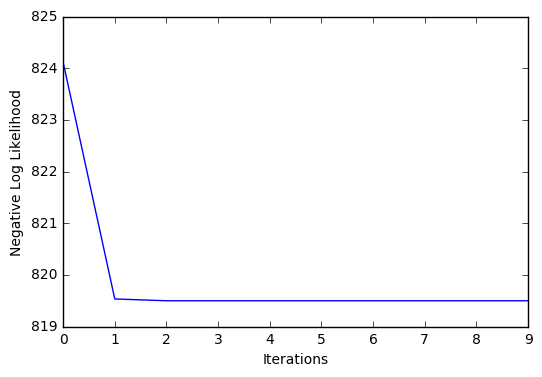

In [3]:

sol = np.zeros(31)
#sol = sol_ini
W0 = np.zeros([N,N])
r = np.zeros(31)
r[0:30] = 1
r[30] = 0
#print(r)
#print(m.shape)
T = np.zeros((32,32))
T[:31,31] = r
T[31,:31] = r.T
r_1 = np.zeros(32)

ite = 10
itelist = list()
nll_list =list()



for i in range(ite):
    itelist.append(i)
    sig = logit(sol[0:31])
    W0 = W(sig)
    T[:31,:31] = x.T .dot(W0) .dot (x)
    y_beta = np.dot(numpy.linalg.inv(W0),(y-sig)) + np.dot(x,sol[0:31])
    r_0 = np.dot(np.dot(x.T,W0),y_beta) 
    r_1[:31] = r_0[:31]
    sol = numpy.linalg.solve(T, r_1)
    nll_list.append(nll(sol[0:31]))
    plt.ylabel('negative log likelihood')
    plt.xlabel('iterations')
    plt.title('Negative Log Likelihood')





plt.plot(itelist,nll_list)
plt.xlabel('Iterations')
plt.ylabel('Negative Log Likelihood')
plt.title('')
plt.show()

In [4]:
for i in range(len(team_name)):
    result[team_name[i]] = sol[i]

sorted(result.items(), key=lambda result:result[1])

[('phi', -1.4669074249142182),
 ('nyk', -1.4196347848721869),
 ('min', -1.2452105617815552),
 ('lal', -1.0673091657529661),
 ('orl', -0.90490166122492932),
 ('sac', -0.60082131658254379),
 ('den', -0.57112965998339538),
 ('cha', -0.51595307738272866),
 ('det', -0.44565737046270337),
 ('ind', -0.25466599588855121),
 ('mia', -0.20291861771517747),
 ('bos', -0.1716920061218361),
 ('bkn', -0.17140891860711821),
 ('mil', -0.093527892460574816),
 ('uta', -0.012741496212831344),
 ('phx', 0.032191227600400878),
 ('okc', 0.17793802295357314),
 ('was', 0.22035141307851758),
 ('nop', 0.33056154050531805),
 ('tor', 0.35350071945547518),
 ('chi', 0.35907120709115786),
 ('por', 0.52161916273328446),
 ('dal', 0.52396597550501167),
 ('sas', 0.72627777066936738),
 ('lac', 0.75946678642743848),
 ('mem', 0.79341213706384661),
 ('cle', 0.83294244456804323),
 ('atl', 0.85168554691723808),
 ('hou', 0.9812357088813255),
 ('gsw', 1.6802602865133172)]

## Problem 6(c)(d)

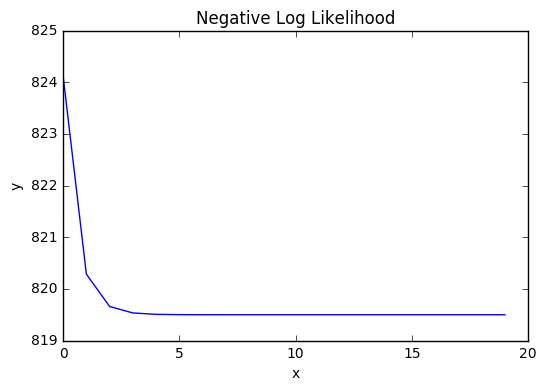

In [5]:
sol = np.zeros(31)
#sol = (2/10) * sol_ini
W0 = 1/8 * np.identity(N)
r = np.zeros(31)
r[0:30] = 1
r[30] = 0
#print(r)
#print(m.shape)
T = np.zeros((32,32))
T[:31,31] = r
T[31,:31] = r.T
r_1 = np.zeros(32)

ite = 20
itelist = list()
nll_list =list()



for i in range(ite):
    itelist.append(i)
    sig = logit(sol[0:31])
   #W0 = W(sig)
    T[:31,:31] = x.T .dot(W0) .dot (x)
    y_beta = 4*(y- sig) + np.dot(x,sol[0:31])
    r_0 = np.dot(np.dot(x.T,W0),y_beta) 
    r_1[:31] = r_0[:31]
    sol = numpy.linalg.solve(T, r_1)
    nll_list.append(nll(sol[0:31]))
    plt.ylabel('negative log likelihood')
    plt.xlabel('iterations')
    plt.title('Negative Log Likelihood')



plt.plot(itelist,nll_list)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
for i in range(len(team_name)):
    result[team_name[i]] = sol[i]

mm = sorted(result.items(), key=lambda result:result[1])
mm

[('phi', -1.4669072161579526),
 ('nyk', -1.4196345973842961),
 ('min', -1.245210379906142),
 ('lal', -1.0673090402145267),
 ('orl', -0.90490159074085286),
 ('sac', -0.60082127033828414),
 ('den', -0.57112960735847074),
 ('cha', -0.51595303670869774),
 ('det', -0.44565733782450223),
 ('ind', -0.25466597619052728),
 ('mia', -0.20291860593538102),
 ('bos', -0.17169199450110811),
 ('bkn', -0.17140890934618136),
 ('mil', -0.093527884124359292),
 ('uta', -0.012741501496039849),
 ('phx', 0.032191219896085692),
 ('okc', 0.17793800528470985),
 ('was', 0.22035139590191466),
 ('nop', 0.33056150620365149),
 ('tor', 0.3535006940101002),
 ('chi', 0.35907118071505661),
 ('por', 0.5216191172907485),
 ('dal', 0.52396592727066049),
 ('sas', 0.72627770627715549),
 ('lac', 0.75946671111631336),
 ('mem', 0.79341205634025957),
 ('cle', 0.83294237118155012),
 ('atl', 0.85168547884837098),
 ('hou', 0.98123560680142485),
 ('gsw', 1.6802599710893209)]

## Problem 6(e)

### Win/Loss Percentages

In [7]:
print ('win/loss percentage:')
frac = list()
for i in range (len(team_name)):
    m = 0
    n = 0
    
    for j in range(len(y)):
        if (team_name[i] == match_list[j][0]):
            if (y[j] == 1):
                m += 1
            else:
                n += 1
        if (team_name[i] == match_list[j][1]):
            if (y[j] == 0):
                m += 1
            else:
                n += 1
    frac.append(m/n)
    #print (round(m/n,4))
    #print (team_name[i],(m/n))
for i in range(len(team_name)):
    result[team_name[i]] = frac[i]

k = sorted(result.items(), key=lambda result:result[1])   
k
#print (frac)

win/loss percentage:


[('phi', 0.2857142857142857),
 ('nyk', 0.2898550724637681),
 ('min', 0.3088235294117647),
 ('lal', 0.36363636363636365),
 ('orl', 0.45901639344262296),
 ('sac', 0.543859649122807),
 ('den', 0.5517241379310345),
 ('cha', 0.6666666666666666),
 ('det', 0.7115384615384616),
 ('mia', 0.8367346938775511),
 ('ind', 0.8541666666666666),
 ('bkn', 0.8775510204081632),
 ('uta', 0.9148936170212766),
 ('bos', 0.9375),
 ('phx', 0.9555555555555556),
 ('mil', 0.9787234042553191),
 ('okc', 1.119047619047619),
 ('nop', 1.2195121951219512),
 ('was', 1.2272727272727273),
 ('chi', 1.380952380952381),
 ('dal', 1.4102564102564104),
 ('tor', 1.4864864864864864),
 ('por', 1.4864864864864864),
 ('lac', 1.641025641025641),
 ('mem', 1.6756756756756757),
 ('sas', 1.7352941176470589),
 ('cle', 1.8918918918918919),
 ('hou', 1.9444444444444444),
 ('atl', 2.1515151515151514),
 ('gsw', 3.9545454545454546)]

### Check if linear model can match win/loss percentage

In [8]:
sum = 0
for i in range (len(team_name)):
    if (linear_model[i][0] == k [i][0]):
        sum += 1
print ('Match number:',sum)

Match number: 11


### Check if nonlinear model can match win/loss percentage

In [9]:
sum = 0
for i in range (len(team_name)):
    if (mm[i][0] == k[i][0]):
        sum += 1
print ('Match number:',sum)

Match number: 12


### Summary

Compared with the win/loss percentage, the ranking estimation using logistic regression basically has the similar results but not exactly the same. As seen from the ranking results, some teams' betas are very close, which leads to a different order among 2 or 3 teams from the win/loss ranking. This makes sense because the score of each team should be independent but our derived non-linear model takes the score differences (y = 1,0) between 2 teams into consideration. The underlying assumption is that these 30 teams may have correlations, leading to the differences between our results and the win/loss ranking. 

Compared with the results from linear model we applied in the last homework, logistic regressin seem to have a better performance. (Logistic regression predicts 12 correct rankings but linear regression predicts 11 correct rankings). It seems that for this NBA ranking, logistic regression performs well since score differences are converted into (0,1) binary number, which makes the classification more robust to numerical factors.